<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Description" data-toc-modified-id="Problem-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem Description</a></span></li><li><span><a href="#Task" data-toc-modified-id="Task-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Task</a></span></li><li><span><a href="#Alternative-Proposal-distribution" data-toc-modified-id="Alternative-Proposal-distribution-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Alternative Proposal distribution</a></span></li></ul></div>

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

## Problem Description

We work with the unnormalized target distribution:
$ p(x) = N(x | -4, 0.5^2 ) + N(x | 4, 1^2 )$

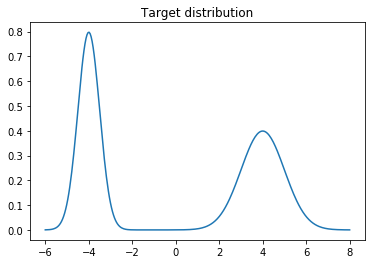

In [5]:
def target_dist(x):
    return (stats.norm.pdf(x, loc=-4, scale=0.5) +
            stats.norm.pdf(x, loc=4, scale=1))
    
x = np.linspace(-6,8, 300)
y = [y for y in target_dist(x)]

plt.plot(x,y)
plt.title("Target distribution")
plt.show()


And the proposal distribution:
$ q(x, x_0 ) = N (x | x_0 , \epsilon )$
where $\epsilon$ is a parameter we can choose to optimize the performance of the algorithm.

In [31]:
def proposal_dist(x_0, epsilon):
    return stats.norm.rvs(loc=x_0, scale=epsilon, size=1)

We can obviously generate samples from p(x) directly in this case, but let’s explore how the
Metropolis-Hastings algorithm performs. We measure performance in two ways.
1. Ideally, there would be little correlation between consecutive samples since we ultimately
want to generate independent samples from the target distribution.
2. We want the algorithm to move around within and between the two peaks of the distribution
as much as possible. If the algorithm gets stuck in one of the two peaks, we would never
see samples from the other peak even though we should.

## Task

Implement the Metropolis-Hastings algorithm for the given target and proposal distributions.
- Run the algorithm with each of the values $\epsilon$ = 0.5, 1, 2, 4.
- For each $\epsilon$, plot the samples, $x_t$, for t = 0, 1, . . . , 1000 to show how the samples change over time.

In [54]:
epsilons = [0.5, 1, 2, 4]
results = {}
n = 1000

for epsilon in epsilons:
    samples = []
    acceptance_rate_counter = 0
    x_0 = 0
    for t in range(n):
        x = proposal_dist(x_0, epsilon)
        a = target_dist(x) / target_dist(x_0)

        if np.random.uniform(0,1) < min(1, a):
            x_0 = x
            acceptance_rate_counter += 1
        else:
            x_0 = x_0
        samples.append(float(x_0))
    results[epsilon] = {}
    results[epsilon]['samples'] = samples
    results[epsilon]['AR'] = acceptance_rate_counter/n

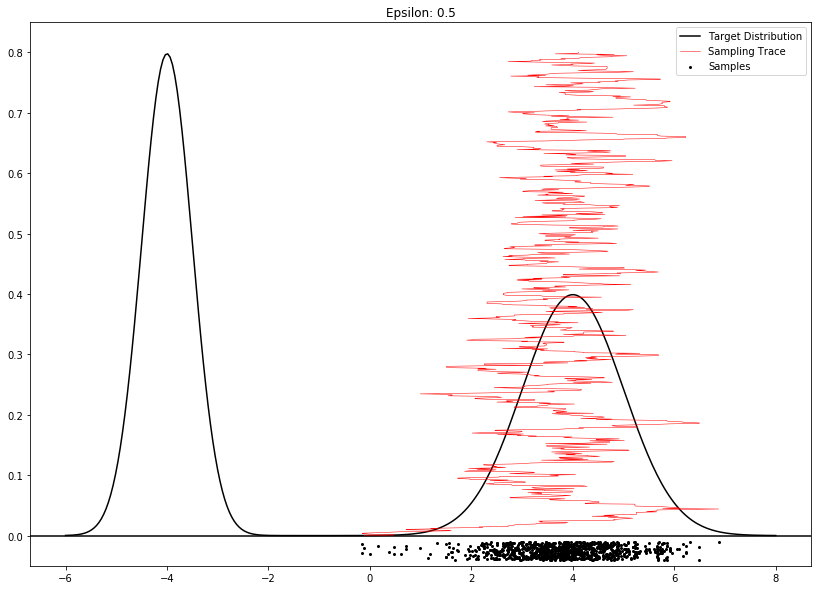

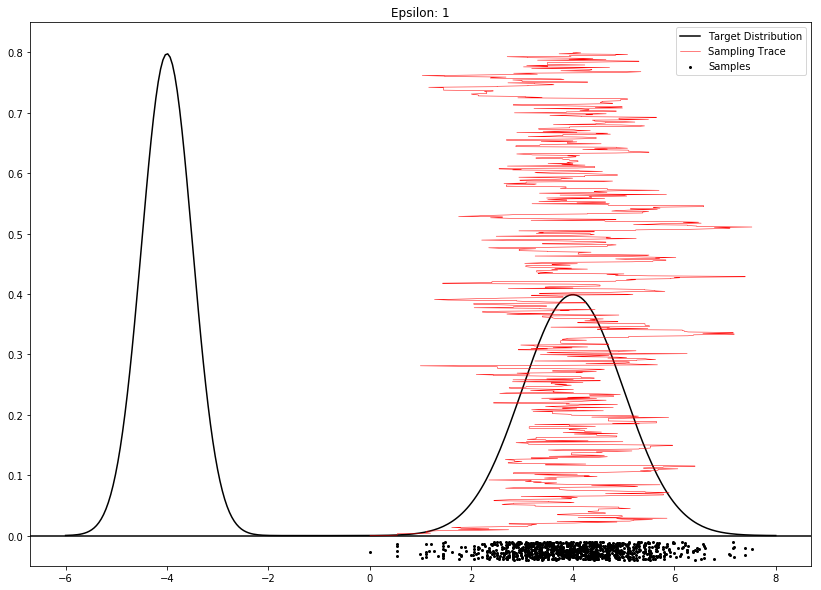

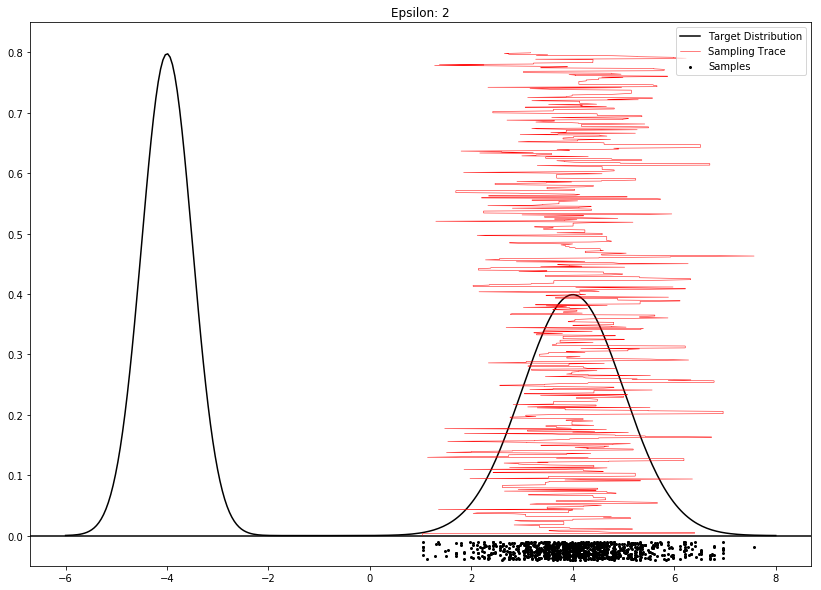

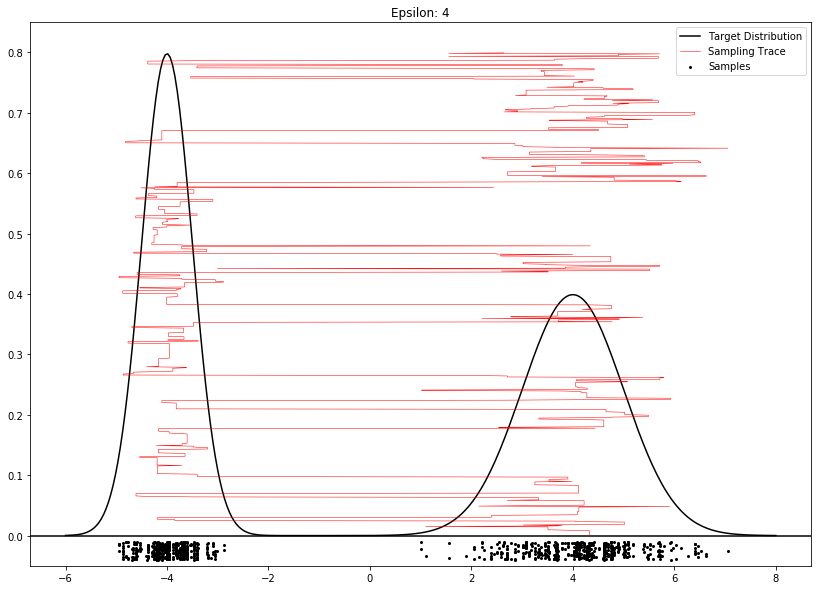

In [56]:
for epsilon in epsilons:
    plt.figure(figsize=(14,10))
    samples = results[epsilon]['samples']
    
    #original distribution
    x = np.linspace(-6,8, 300)
    y = [y for y in target_dist(x)]
    plt.plot(x,y, label="Target Distribution", color='k')
    
    #0 line
    plt.axhline(0, color='k')
    
    #samples
    y = np.random.uniform(-0.04, -0.01, size=len(samples))
    plt.scatter(samples,y, label="Samples", color='k', s=4)
    
    #trace
    y = np.linspace(0,0.8, len(samples))
    plt.plot(samples, y, label="Sampling Trace", color='r', linewidth=0.5)
    
    plt.ylim(-0.05, 0.85)
    plt.title("Epsilon: "+ str(epsilon))
    plt.legend()
    plt.show()

We can see that at an epsilon value of 2, our algorithm manages to explore both peaks. Only at a value of 4, however, it continuously manages to jump back and forth. Let's look at some metrics:

- What is the acceptance rate?

In [57]:
for epsilon in epsilons:
    print("Acceptance rate of epsilon =", epsilon, " is: ", results[epsilon]['AR'])

Acceptance rate of epsilon = 0.5  is:  0.849
Acceptance rate of epsilon = 1  is:  0.716
Acceptance rate of epsilon = 2  is:  0.515
Acceptance rate of epsilon = 4  is:  0.243


- How correlated are the samples?

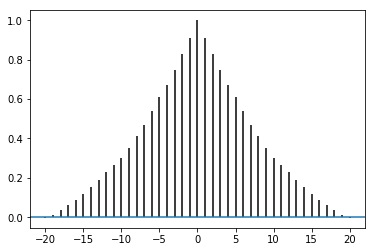

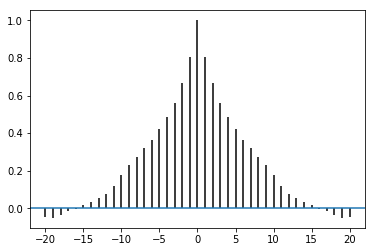

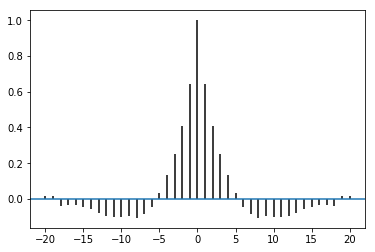

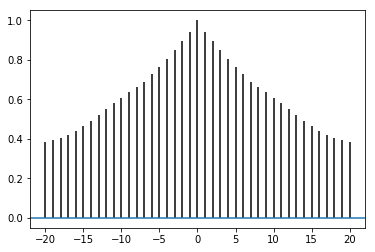

In [61]:
from scipy import signal
    
for epsilon in epsilons:
    samples = results[epsilon]['samples']
    
    plt.acorr(samples, maxlags=20,
    detrend=lambda x: signal.detrend(x, type='constant'))
    plt.show()

- Which value of ε is the best?

Looking at the tracer plots, acceptance rate and auto-correlation, an epsilon value of ~2-4 seems to be ideal.

## Alternative Proposal distribution

Design a different proposal distribution that will fare better on this problem, run it
and add a 5th plot.

In [62]:
def proposal_dist_new(x_0, epsilon):
    return stats.cauchy.rvs(loc=x_0, scale=epsilon, size=1)

In [65]:
epsilons = [0.1, 0.3, 0.5, 1, 2]
results = {}
n = 1000

for epsilon in epsilons:
    samples = []
    acceptance_rate_counter = 0
    x_0 = 0
    for t in range(n):
        x = proposal_dist_new(x_0, epsilon)
        a = target_dist(x) / target_dist(x_0)

        if np.random.uniform(0,1) < min(1, a):
            x_0 = x
            acceptance_rate_counter += 1
        else:
            x_0 = x_0
        samples.append(float(x_0))
    results[epsilon] = {}
    results[epsilon]['samples'] = samples
    results[epsilon]['AR'] = acceptance_rate_counter/n

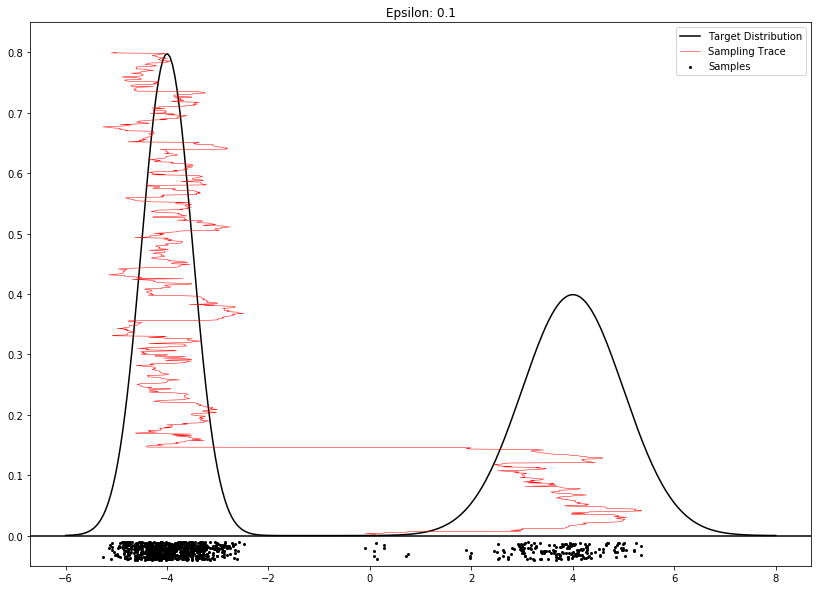

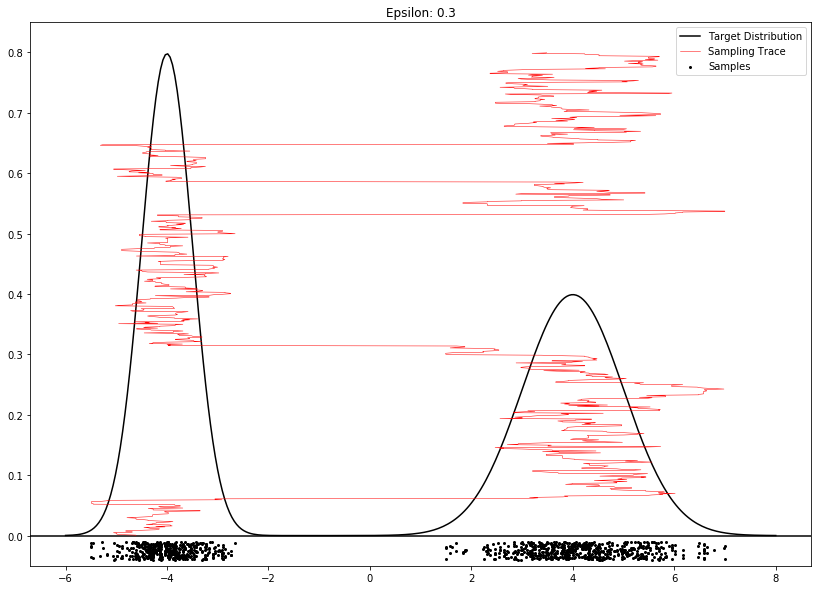

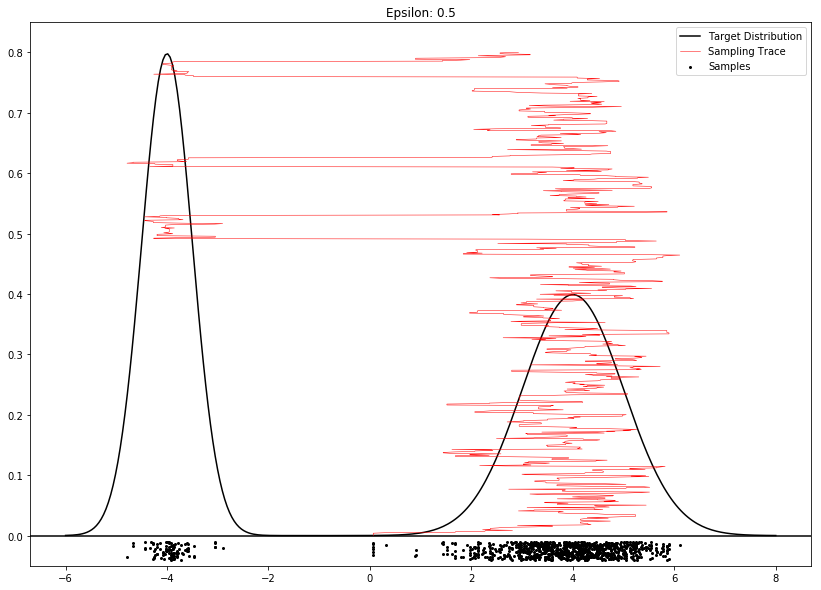

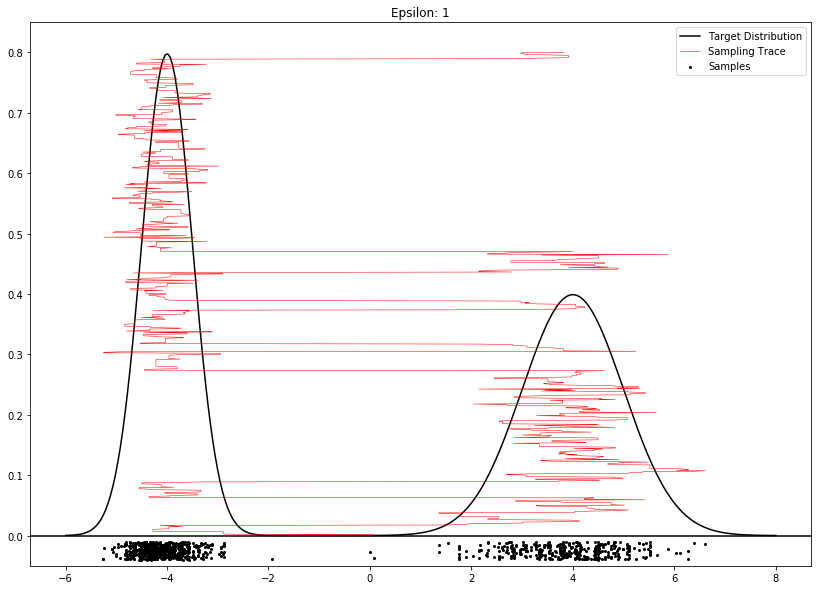

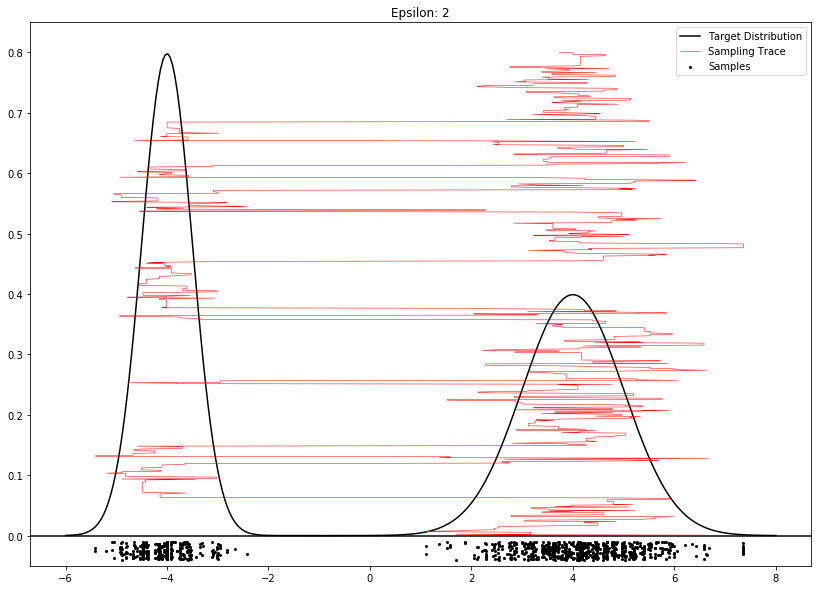

In [66]:
for epsilon in epsilons:
    plt.figure(figsize=(14,10))
    samples = results[epsilon]['samples']
    
    #original distribution
    x = np.linspace(-6,8, 300)
    y = [y for y in target_dist(x)]
    plt.plot(x,y, label="Target Distribution", color='k')
    
    #0 line
    plt.axhline(0, color='k')
    
    #samples
    y = np.random.uniform(-0.04, -0.01, size=len(samples))
    plt.scatter(samples,y, label="Samples", color='k', s=4)
    
    #trace
    y = np.linspace(0,0.8, len(samples))
    plt.plot(samples, y, label="Sampling Trace", color='r', linewidth=0.5)
    
    plt.ylim(-0.05, 0.85)
    plt.title("Epsilon: "+ str(epsilon))
    plt.legend()
    plt.show()

In [67]:
for epsilon in epsilons:
    print("Acceptance rate of epsilon =", epsilon, " is: ", results[epsilon]['AR'])

Acceptance rate of epsilon = 0.1  is:  0.843
Acceptance rate of epsilon = 0.3  is:  0.719
Acceptance rate of epsilon = 0.5  is:  0.663
Acceptance rate of epsilon = 1  is:  0.435
Acceptance rate of epsilon = 2  is:  0.372


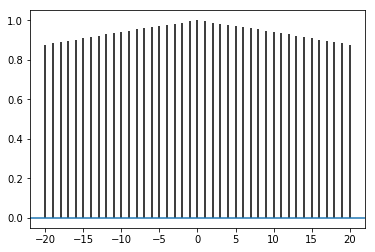

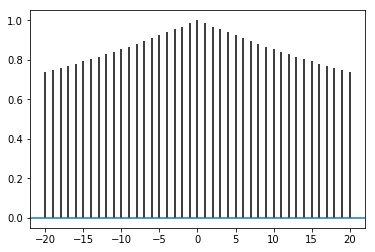

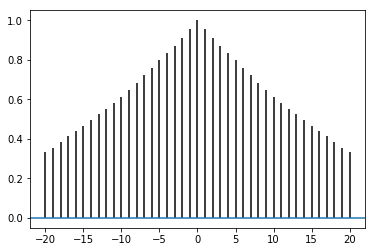

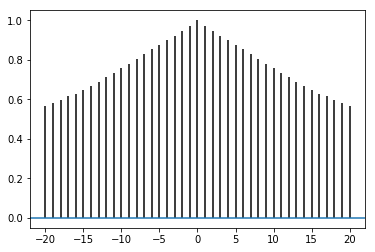

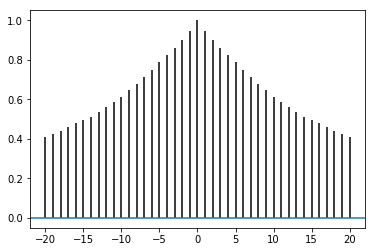

In [68]:
for epsilon in epsilons:
    samples = results[epsilon]['samples']
    
    plt.acorr(samples, maxlags=20,
    detrend=lambda x: signal.detrend(x, type='constant'))
    plt.show()

This seems to be barely better than the normal proposal distribution above. The samples are more distributed across the peaks and have higher acceptance rate, but they are correlated strongly.